In [1]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Machine Learning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Dataframe

In [2]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\Bank Marketing Campaign Dataset.csv")

In [3]:
df

occupation  age    education_level marital_status  \
0      administrative_staff   28        high_school        married   
1      administrative_staff   58       unidentified        married   
2                   jobless   40        high_school       divorced   
3            retired_worker   63        high_school        married   
4            business_owner   43            college        married   
...                     ...  ...                ...            ...   
45206  administrative_staff   50        high_school       divorced   
45207    independent_worker   49            college        married   
45208             executive   30            college        married   
45209        retired_worker   59  elementary_school        married   
45210  technical_specialist   34            college       divorced   

      communication_channel call_month  call_day  call_duration  \
0              unidentified  September         9              1   
1              unidentified       June         5            307   
2                    mobile   February         4            113   
3                    mobile      April         7             72   
4                  landline       July        29            184   
...                     ...        ...       ...            ...   
45206                mobile        May         6            114   
45207          unidentified        May        13             98   
45208                mobile       June        12            175   
45209              landline       July        15             41   
45210          unidentified        May        29            578   

       call_frequency previous_campaign_outcome conversion_status  
0                   1                successful     not_converted  
1                   2              unidentified     not_converted  
2                   1              unidentified     not_converted  
3                   5              unidentified     not_converted  
4                   4              unidentified     not_converted  
...               ...                       ...               ...  
45206               1              unsuccessful     not_converted  
45207               1              unidentified     not_converted  
45208               2             other_outcome     not_converted  
45209               5              unidentified     not_converted  
45210               3              unidentified     not_converted  

[45211 rows x 11 columns]

# Dataframe Observation


Dependent - conversion_status
Independent - occupation, age,	education_level,	marital_status,	communication_channel,	call_month,	call_day,	call_duration,	call_frequency,	previous_campaign_outcome

continuous_columns = ["call_duration", "call_frequency"]
category_columns = ["occupation", "age", "education_level", "marital_status", "communication_channel",
                    "call_month", "call_day", "previous_campaign_outcome", "conversion_status"]

# Supervised Classification

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
continuous_columns = ["call_duration", "call_frequency"]
category_columns = ["occupation", "age", "education_level", "marital_status", "communication_channel",
                    "call_month", "call_day", "previous_campaign_outcome", "conversion_status"]

In [6]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df.drop_duplicates()

occupation  age    education_level marital_status  \
0      administrative_staff   28        high_school        married   
1      administrative_staff   58       unidentified        married   
2                   jobless   40        high_school       divorced   
3            retired_worker   63        high_school        married   
4            business_owner   43            college        married   
...                     ...  ...                ...            ...   
45206  administrative_staff   50        high_school       divorced   
45207    independent_worker   49            college        married   
45208             executive   30            college        married   
45209        retired_worker   59  elementary_school        married   
45210  technical_specialist   34            college       divorced   

      communication_channel call_month  call_day  call_duration  \
0              unidentified  September         9              1   
1              unidentified       June         5            307   
2                    mobile   February         4            113   
3                    mobile      April         7             72   
4                  landline       July        29            184   
...                     ...        ...       ...            ...   
45206                mobile        May         6            114   
45207          unidentified        May        13             98   
45208                mobile       June        12            175   
45209              landline       July        15             41   
45210          unidentified        May        29            578   

       call_frequency previous_campaign_outcome conversion_status  
0                   1                successful     not_converted  
1                   2              unidentified     not_converted  
2                   1              unidentified     not_converted  
3                   5              unidentified     not_converted  
4                   4              unidentified     not_converted  
...               ...                       ...               ...  
45206               1              unsuccessful     not_converted  
45207               1              unidentified     not_converted  
45208               2             other_outcome     not_converted  
45209               5              unidentified     not_converted  
45210               3              unidentified     not_converted  

[45205 rows x 11 columns]

# Statistical Analysis/ Hypothesis Testin

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [10]:
def hypothesisTesting(continuous_columns=[], category_columns=[], sampling_rate=0.20, sampling_frac=0.05):
    # Central Limit Theorem
    oneContinuousColumn_result = {}
    hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
    
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            population = df[column].values
            population_mean = population.mean()
            sample_mean = []
            for i in range(40):
                sample = np.random.choice(population, samplesize)
                sample_mean.append(sample.mean())
            oneContinuousColumn_result[column] = {
                "Population Mean": population_mean,
                "Sample Means": {np.mean(sample_mean)}
            }

    # 1-Tailed Test
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(samplesize):
                sample = df[column].sample(frac=sampling_frac)
                t_test, p_value = stats.ttest_1samp(sample, df[column].mean())
                if p_value > 0.5:
                    H0_accepted += 1
                else:
                    H0_rejected += 1

            if H0_accepted > H0_rejected:
                oneContinuousColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                })
                hypothesis_df.loc[column, column] = "There is a relationship"
            else:
                oneContinuousColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                })
                hypothesis_df.loc[column, column] = "There is no relationship"

    # 2-Tailed Test
    for i in range(len(continuous_columns) - 1):
        column_1 = continuous_columns[i]
        for column_2 in continuous_columns[i + 1:]:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(20):
                sample1 = df[column_1].sample(frac=sampling_frac)
                sample2 = df[column_2].sample(frac=sampling_frac)
                t_test, p_value = stats.ttest_ind(sample1, sample2)
                if p_value > 0.5:
                    H0_accepted += 1
                else:
                    H0_rejected += 1

            if H0_accepted > H0_rejected:
                hypothesis_df.loc[column_1, column_2] = "There is a relationship"
                hypothesis_df.loc[column_2, column_1] = "There is a relationship"
            else:
                hypothesis_df.loc[column_1, column_2] = "There is no relationship"
                hypothesis_df.loc[column_2, column_1] = "There is no relationship"

    # Chi-Square Test
    if category_columns:
        for i in range(len(category_columns) - 1):
            column_1 = category_columns[i]
            for column_2 in category_columns[i + 1:]:
                data = pd.crosstab(df[column_1], df[column_2])
                observed_values = data.values
                chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

                if p_value > 0.05:
                    hypothesis_df.loc[column_1, column_2] = "There is no relationship"
                    hypothesis_df.loc[column_2, column_1] = "There is no relationship"
                else:
                    hypothesis_df.loc[column_1, column_2] = "There is a relationship"
                    hypothesis_df.loc[column_2, column_1] = "There is a relationship"

    # ANOVA
    if continuous_columns and category_columns:
        for category_column in category_columns:
            for continuous_column in continuous_columns:
                group = df[category_column].unique()
                data = {}
                for i in group:
                    data[i] = df[continuous_column][df[category_column] == i]

                f_value, p_value = stats.f_oneway(*[data[i] for i in group])
                if p_value > 0.05:
                    hypothesis_df.loc[category_column, continuous_column] = "There is a relationship"
                    hypothesis_df.loc[continuous_column, category_column] = "There is a relationship"
                else:
                    hypothesis_df.loc[category_column, continuous_column] = "There is no relationship"
                    hypothesis_df.loc[continuous_column, category_column] = "There is no relationship"

    return oneContinuousColumn_result, hypothesis_df

In [14]:
import pandas as pd

# Assuming df is your DataFrame

# Drop non-numeric columns or encode them appropriately
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix

age  call_day  call_duration  call_frequency
age             1.000000 -0.009120      -0.004648         0.00476
call_day       -0.009120  1.000000      -0.030206         0.16249
call_duration  -0.004648 -0.030206       1.000000        -0.08457
call_frequency  0.004760  0.162490      -0.084570         1.00000

In [15]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [16]:

ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

call_duration  \
Population Mean                                          258.16308   
Sample Means                                   {258.3358714886087}   
H0_accepted                                                   4528   
H0_rejected                                                   4514   
Conclusion       H0 is accepted, Ha is rejected, There is no si...   

                                                    call_frequency  
Population Mean                                           2.763841  
Sample Means                                  {2.7553168546781683}  
H0_accepted                                                   4647  
H0_rejected                                                   4395  
Conclusion       H0 is accepted, Ha is rejected, There is no si...

In [17]:

comperativeColumn_result

occupation                       age  \
occupation                                      NaN   There is a relationship   
age                         There is a relationship                       NaN   
education_level             There is a relationship   There is a relationship   
marital_status              There is a relationship   There is a relationship   
communication_channel       There is a relationship   There is a relationship   
call_month                  There is a relationship   There is a relationship   
call_day                    There is a relationship   There is a relationship   
call_duration              There is no relationship  There is no relationship   
call_frequency             There is no relationship  There is no relationship   
previous_campaign_outcome   There is a relationship   There is a relationship   
conversion_status           There is a relationship   There is a relationship   

                                    education_level            marital_status  \
occupation                  There is a relationship   There is a relationship   
age                         There is a relationship   There is a relationship   
education_level                                 NaN   There is a relationship   
marital_status              There is a relationship                       NaN   
communication_channel       There is a relationship   There is a relationship   
call_month                  There is a relationship   There is a relationship   
call_day                    There is a relationship   There is a relationship   
call_duration               There is a relationship  There is no relationship   
call_frequency             There is no relationship  There is no relationship   
previous_campaign_outcome   There is a relationship   There is a relationship   
conversion_status           There is a relationship   There is a relationship   

                              communication_channel                call_month  \
occupation                  There is a relationship   There is a relationship   
age                         There is a relationship   There is a relationship   
education_level             There is a relationship   There is a relationship   
marital_status              There is a relationship   There is a relationship   
communication_channel                           NaN   There is a relationship   
call_month                  There is a relationship                       NaN   
call_day                    There is a relationship   There is a relationship   
call_duration              There is no relationship  There is no relationship   
call_frequency             There is no relationship  There is no relationship   
previous_campaign_outcome   There is a relationship   There is a relationship   
conversion_status           There is a relationship   There is a relationship   

                                           call_day             call_duration  \
occupation                  There is a relationship  There is no relationship   
age                         There is a relationship  There is no relationship   
education_level             There is a relationship   There is a relationship   
marital_status              There is a relationship  There is no relationship   
communication_channel       There is a relationship  There is no relationship   
call_month                  There is a relationship  There is no relationship   
call_day                                        NaN  There is no relationship   
call_duration              There is no relationship   There is a relationship   
call_frequency             There is no relationship  There is no relationship   
previous_campaign_outcome   There is a relationship  There is no relationship   
conversion_status           There is a relationship  There is no relationship   

                                     call_frequency previous_campaign_outcome  \
occupation                 There is no relationship   There is a rel

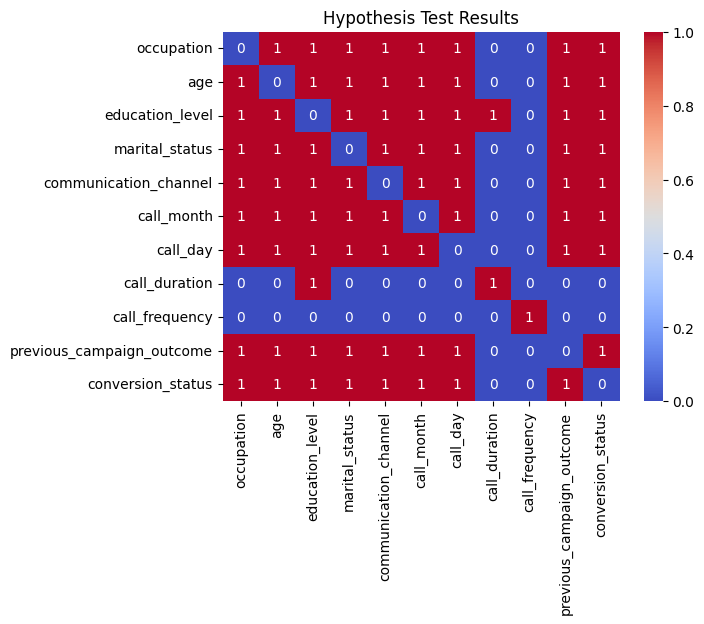

In [18]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [21]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 1, 'There is no relationship': 0}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()
     

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_11660\1214076742.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comperativeColumn_result.replace({'There is a relationship': 1, 'There is no relationship': 0}, inplace=True)


# Pre Processing

In [22]:
category_columns = ["occupation", "age", "education_level", "marital_status", "communication_channel",
                    "call_month", "call_day", "previous_campaign_outcome", "conversion_status"]

In [23]:

df.communication_channel.unique()

array(['unidentified', 'mobile', 'landline'], dtype=object)

In [25]:
# Replacing categorical values with numerical
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()
df.occupation=encode.fit_transform(df[["occupation"]])
df.education_level=encode.fit_transform(df[["education_level"]])
df.marital_status=encode.fit_transform(df[["marital_status"]])
df.communication_channel=encode.fit_transform(df[["communication_channel"]])
df.call_month=encode.fit_transform(df[["call_month"]])
df.previous_campaign_outcome=encode.fit_transform(df[["previous_campaign_outcome"]])
df.conversion_status=encode.fit_transform(df[["conversion_status"]])

# Machine Learning

In [26]:
x=df.drop("conversion_status",axis=1)
y=df["conversion_status"]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [28]:
model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.8708307528974608

In [30]:
input = np.array([[7,29,3,1,2,9,27,142,4,2]])
prediction = model.predict(input)
prediction

c:\Users\Saravanan\OneDrive\Desktop\Dataset\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1.])